In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib #para guardar modelo

#cargar dataset
df = pd.read_csv('C:/Users/dassl/Desktop/PythonSamsung/Módulo IA/BankRetention_Project/Data/Churn_Modelling.csv')

#Ver primeras filas
print("Datos cargados correctamente:")
print(df.head())

Datos cargados correctamente:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93

In [8]:
#Preprocesamiento de datos
#Eliminar columnas no relevantes
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#Separar features (X) y target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

#Dividr entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (8000, 10), Prueba: (2000, 10)


In [14]:
#Definir columnas numericas y columnas categóricas
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

#Crear transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

#Crear el pipeline completo
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

#Entrenar modelo
print("Entrenando el modelo...")
model_pipeline.fit(X_train, y_train)
print("Modelo Entrenado!")

Entrenando el modelo...
Modelo Entrenado!


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



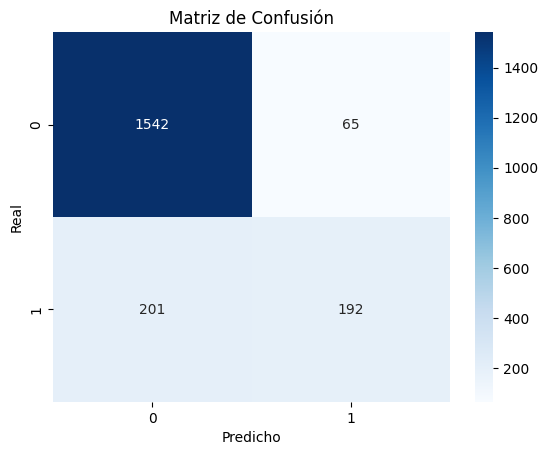

In [15]:
#Evaluación
y_pred = model_pipeline.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

#Matriz de confusión simple
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [16]:
#Guardar modelo
joblib.dump(model_pipeline, 'C:/Users/dassl/Desktop/PythonSamsung/Módulo IA/BankRetention_Project/Models/model_churn.pkl')
print("Modelo guardado exitosamente en: C:/Users/dassl/Desktop/PythonSamsung/Módulo IA/BankRetention_Project/Models/model_churn.pkl")


Modelo guardado exitosamente en: C:/Users/dassl/Desktop/PythonSamsung/Módulo IA/BankRetention_Project/Models/model_churn.pkl
